In [8]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

624

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hobart
Processing Record 2 of Set 1 | ayutla
Processing Record 3 of Set 1 | bambous virieux
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | preobrazhenskaya
City not found. Skipping...
Processing Record 6 of Set 1 | new norfolk
Processing Record 7 of Set 1 | tuktoyaktuk
Processing Record 8 of Set 1 | khatanga
Processing Record 9 of Set 1 | roald
Processing Record 10 of Set 1 | kenai
Processing Record 11 of Set 1 | port lincoln
Processing Record 12 of Set 1 | lixourion
Processing Record 13 of Set 1 | barentu
Processing Record 14 of Set 1 | mahebourg
Processing Record 15 of Set 1 | atherton
Processing Record 16 of Set 1 | vao
Processing Record 17 of Set 1 | daru
Processing Record 18 of Set 1 | naron
Processing Record 19 of Set 1 | port alfred
Processing Record 20 of Set 1 | pokrovsk
Processing Record 21 of Set 1 | castro
Processing Record 22 of Set 1 | port elizabeth
Processing

Processing Record 37 of Set 4 | petropavlovsk-kamchatskiy
Processing Record 38 of Set 4 | porto velho
Processing Record 39 of Set 4 | tshela
Processing Record 40 of Set 4 | vanimo
Processing Record 41 of Set 4 | pastos bons
Processing Record 42 of Set 4 | saint george
Processing Record 43 of Set 4 | nanortalik
Processing Record 44 of Set 4 | saldanha
Processing Record 45 of Set 4 | dnestrovsc
Processing Record 46 of Set 4 | puerto leguizamo
Processing Record 47 of Set 4 | kaitangata
Processing Record 48 of Set 4 | santo augusto
Processing Record 49 of Set 4 | balikpapan
Processing Record 50 of Set 4 | paragominas
Processing Record 1 of Set 5 | fairbanks
Processing Record 2 of Set 5 | guarapari
Processing Record 3 of Set 5 | kutum
Processing Record 4 of Set 5 | nelson bay
Processing Record 5 of Set 5 | bowen
Processing Record 6 of Set 5 | luderitz
Processing Record 7 of Set 5 | arrifes
Processing Record 8 of Set 5 | husavik
Processing Record 9 of Set 5 | currais novos
Processing Record 

Processing Record 26 of Set 8 | port moresby
Processing Record 27 of Set 8 | komsomolskiy
Processing Record 28 of Set 8 | goderich
Processing Record 29 of Set 8 | diffa
Processing Record 30 of Set 8 | portland
Processing Record 31 of Set 8 | nechi
Processing Record 32 of Set 8 | henties bay
Processing Record 33 of Set 8 | altusried
Processing Record 34 of Set 8 | tuatapere
Processing Record 35 of Set 8 | yurimaguas
Processing Record 36 of Set 8 | alta floresta
Processing Record 37 of Set 8 | camabatela
Processing Record 38 of Set 8 | santa marta
Processing Record 39 of Set 8 | maldonado
Processing Record 40 of Set 8 | palu
Processing Record 41 of Set 8 | ucluelet
Processing Record 42 of Set 8 | cedar city
Processing Record 43 of Set 8 | plastun
Processing Record 44 of Set 8 | presidencia roque saenz pena
Processing Record 45 of Set 8 | hobyo
Processing Record 46 of Set 8 | ostersund
Processing Record 47 of Set 8 | lolua
City not found. Skipping...
Processing Record 48 of Set 8 | japura

Processing Record 13 of Set 12 | kibala
Processing Record 14 of Set 12 | sabang
Processing Record 15 of Set 12 | rudnogorsk
Processing Record 16 of Set 12 | romny
Processing Record 17 of Set 12 | santa cruz de la palma
Processing Record 18 of Set 12 | maine-soroa
Processing Record 19 of Set 12 | chkalovskoye
Processing Record 20 of Set 12 | el seibo
Processing Record 21 of Set 12 | olenegorsk
Processing Record 22 of Set 12 | kimbe
Processing Record 23 of Set 12 | tuscaloosa
Processing Record 24 of Set 12 | verkhnetulomskiy
Processing Record 25 of Set 12 | la asuncion
Processing Record 26 of Set 12 | prieska
Processing Record 27 of Set 12 | adrar
Processing Record 28 of Set 12 | inirida
Processing Record 29 of Set 12 | farmington
Processing Record 30 of Set 12 | asfi
Processing Record 31 of Set 12 | maues
Processing Record 32 of Set 12 | kozhevnikovo
Processing Record 33 of Set 12 | motala
Processing Record 34 of Set 12 | halalo
City not found. Skipping...
Processing Record 35 of Set 12

In [10]:
len(city_data)

572

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobart,-42.8794,147.3294,56.26,63,90,3.00,AU,2021-12-03 17:28:25
1,Ayutla,20.1167,-104.3333,79.21,30,85,2.62,MX,2021-12-03 17:30:17
2,Bambous Virieux,-20.3428,57.7575,79.05,83,40,4.61,MU,2021-12-03 17:30:17
3,Albany,42.6001,-73.9662,38.08,56,39,5.01,US,2021-12-03 17:30:17
4,New Norfolk,-42.7826,147.0587,55.92,60,56,3.00,AU,2021-12-03 17:29:51
5,Tuktoyaktuk,69.4541,-133.0374,-20.20,76,75,12.66,CA,2021-12-03 17:30:18
6,Khatanga,71.9667,102.5000,-19.80,99,100,13.56,RU,2021-12-03 17:29:41
7,Roald,62.5833,6.1333,30.09,64,75,11.50,NO,2021-12-03 17:30:18
8,Kenai,60.5544,-151.2583,5.14,84,1,3.44,US,2021-12-03 17:30:06
9,Port Lincoln,-34.7333,135.8667,54.57,77,31,10.76,AU,2021-12-03 17:30:19


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

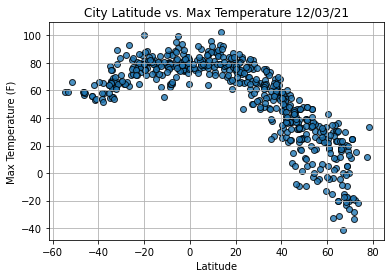

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

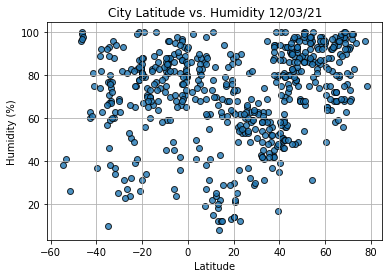

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

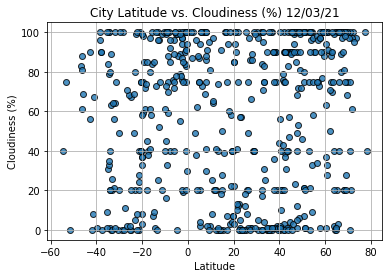

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

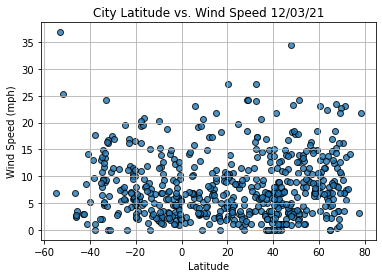

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()